In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as ss

In [2]:
df = pd.read_csv("dataset/insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df['date_incident_conv'] = pd.to_datetime(df['incident_date'], format='mixed')

In [4]:
df['timestamp_date_incident'] = df['date_incident_conv'].apply(lambda x: x.timestamp())
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,date_incident_conv,timestamp_date_incident
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,NaN,2015-01-25,1.422144e+09
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,NaN,2015-01-21,1.421798e+09
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,NaN,2015-02-22,1.424563e+09
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,2015-01-10,1.420848e+09
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,NaN,2015-02-17,1.424131e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,17440,8720,61040,Honda,Accord,2006,N,NaN,2015-02-22,1.424563e+09
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,2015-01-24,1.422058e+09
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,7500,7500,52500,Suburu,Impreza,1996,N,NaN,2015-01-23,1.421971e+09
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,5220,5220,36540,Audi,A5,1998,N,NaN,2015-02-26,1.424909e+09


In [5]:
scaler_minmax = MinMaxScaler()
df['timestamp_norm_incident'] = scaler_minmax.fit_transform(df[['timestamp_date_incident']])

In [6]:
df.drop(columns=['date_incident_conv', 'incident_date', '_c39', 'policy_bind_date', 'timestamp_date_incident'], inplace=True)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,timestamp_norm_incident
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0.406780
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,0.338983
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0.881356
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0.152542
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,0.796610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,0.881356
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,0.389831
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,0.372881
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,0.949153


In [7]:
var_num = df.select_dtypes(include='number').columns.tolist()
print('Total num var:', len(var_num))
var_num

Total num var: 19


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'timestamp_norm_incident']

In [8]:
var_cat = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Jumlah fitur cat:', len(var_cat))
var_cat

Jumlah fitur cat: 19


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [9]:
missing_vals = ["NA", "?", None, np.nan]
err_symbol = ["NA", "?", None]
missing = df.isin(missing_vals)

print(missing.sum())

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [10]:
missing_var = ['collision_type', 'authorities_contacted', 'property_damage', 'police_report_available']

for var in missing_var:
    if df[var].mode()[0] == '?':
        mode_value = df[var].value_counts().index[1]
    else:
        mode_value = df[var].mode()[0]
    
    df[var] = df[var].replace(err_symbol, np.nan)
    df[var] = df[var].fillna(mode_value)

df.isin(missing_vals).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [11]:
df[var_num] = df[var_num].abs()
for var in var_num:
    print(df[var].describe(),'\n')

count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64 

count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64 

count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64 

count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64 

count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.

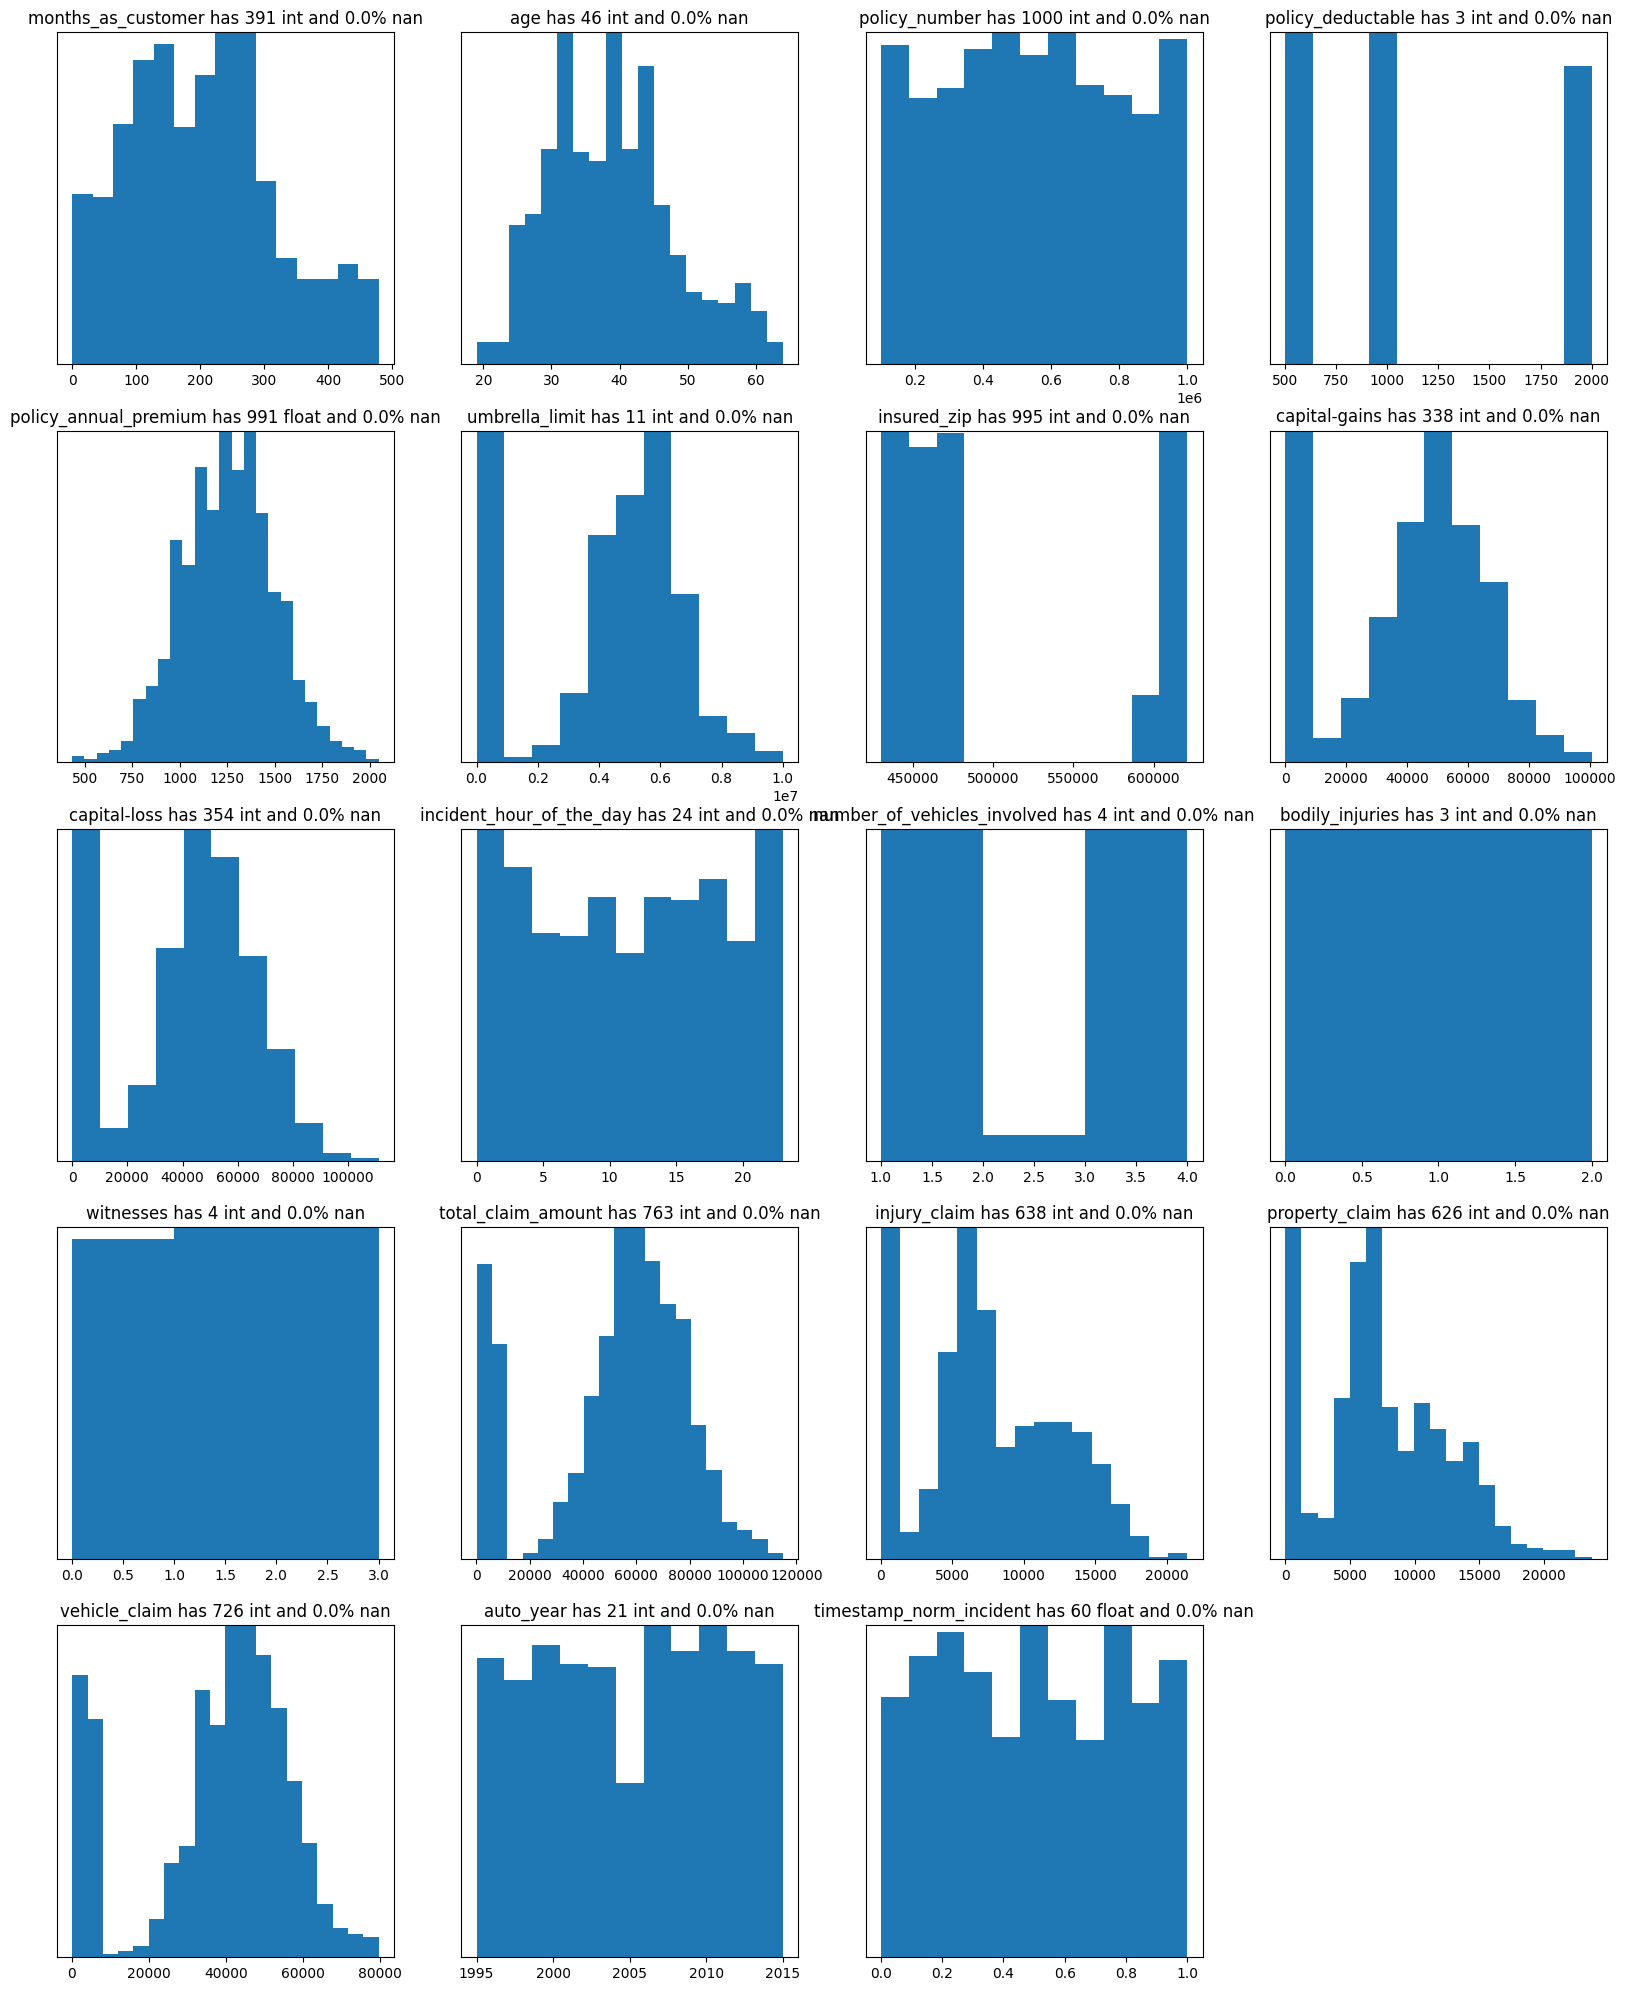

In [12]:
def make_plots(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    idx = df[Vs].index
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        n = df[v].nunique()
        x = np.sum(df.loc[idx,v]!=df.loc[idx,v].astype(int))
        y = np.round(100*np.sum(df[v].isna())/len(df),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(df.loc[idx,v],bins='auto')
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots(var_num)

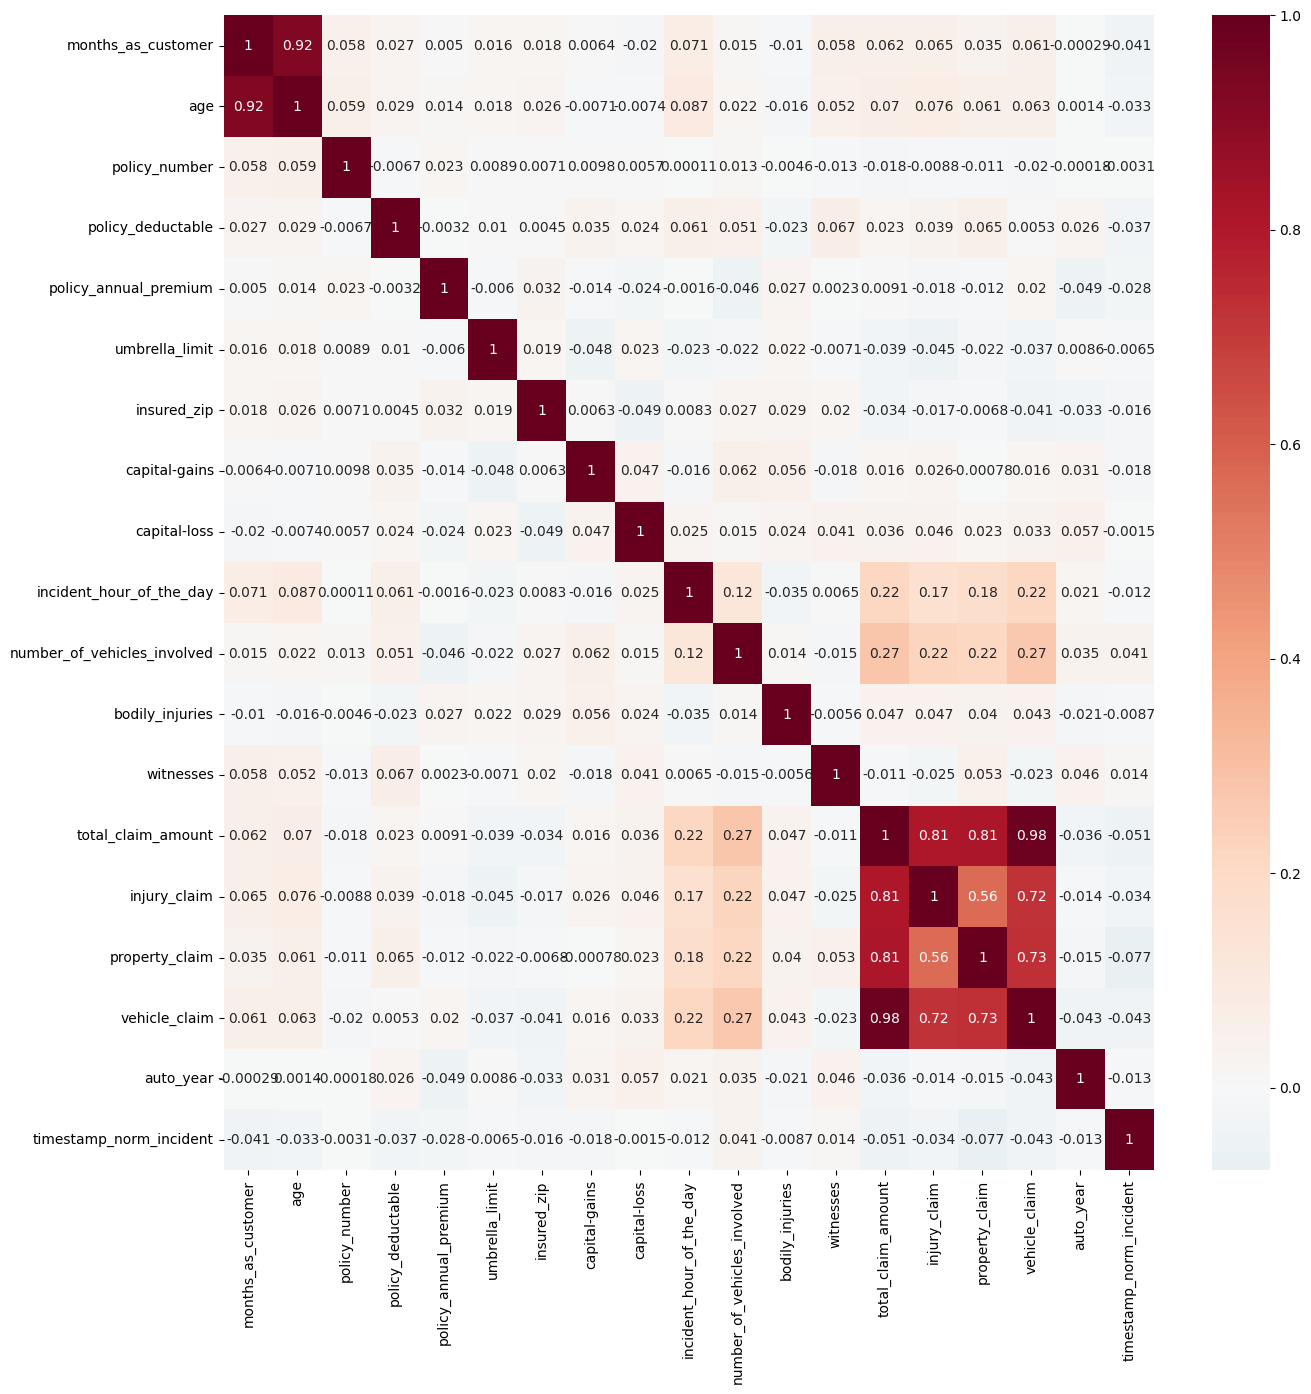

In [13]:
def make_corr(Vs):
    plt.figure(figsize=(15,15))
    sns.heatmap(df[Vs].corr(), cmap='RdBu_r', annot=True, center=0.0)
    plt.show()
make_corr(var_num)

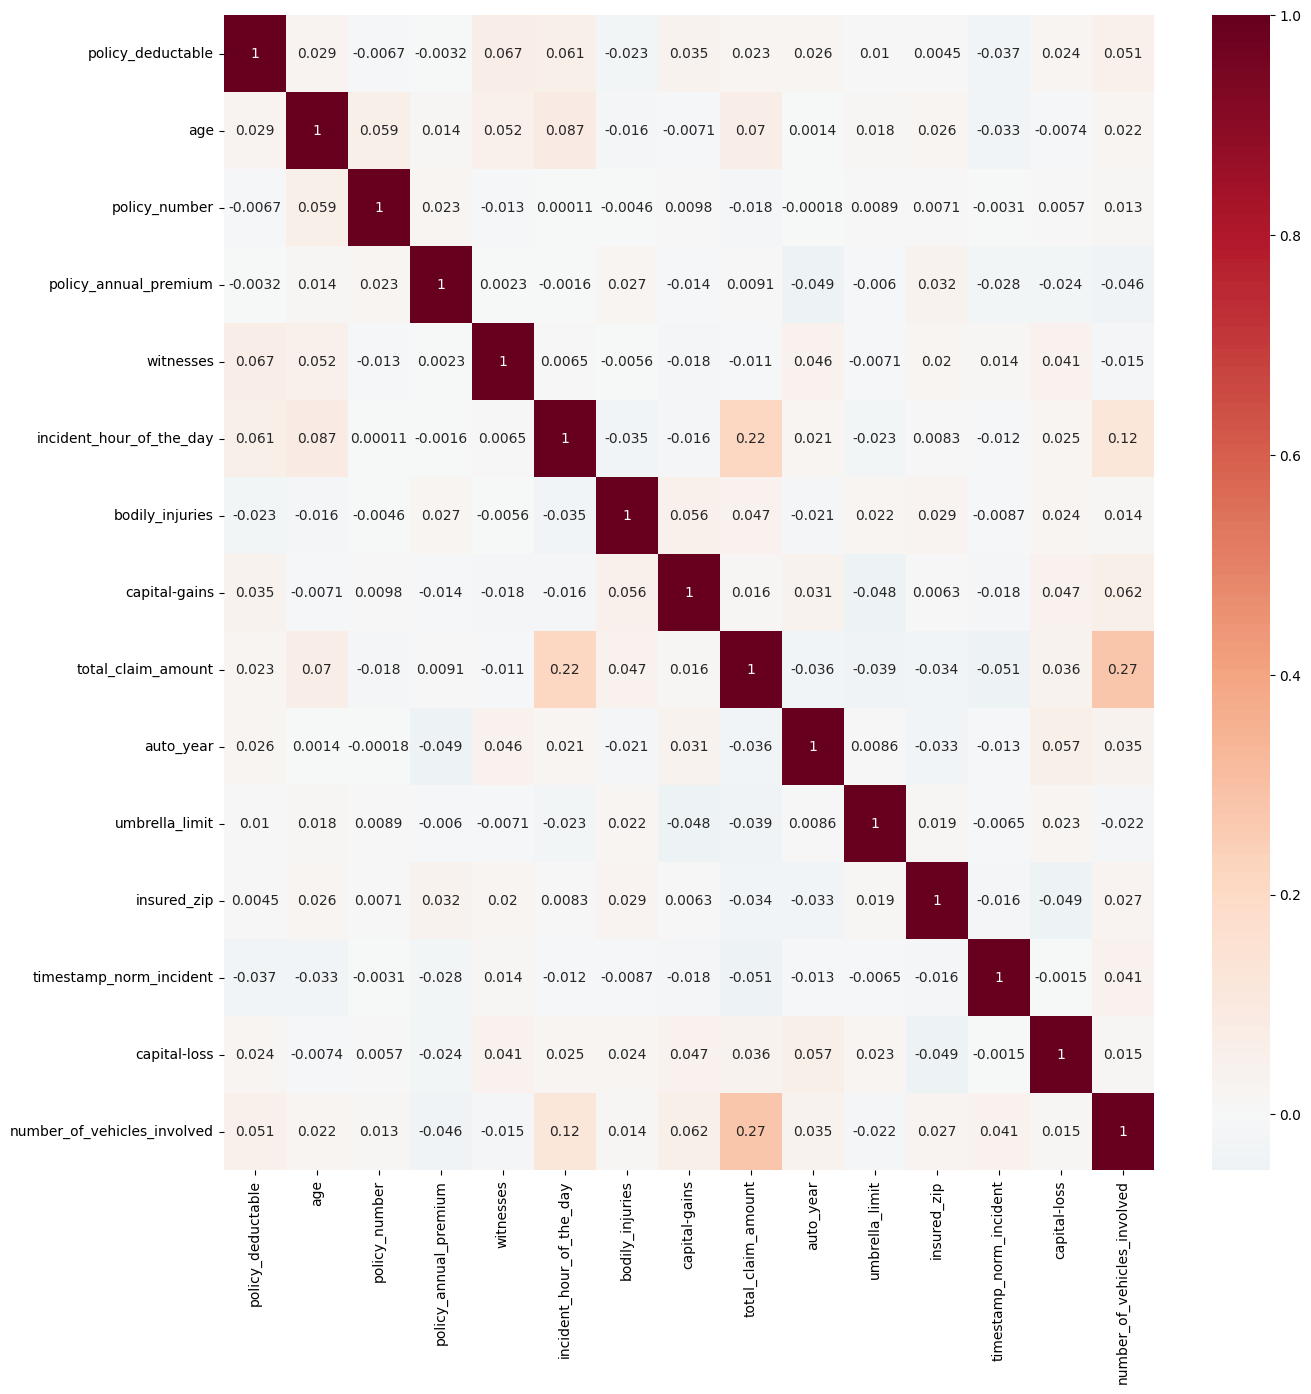

In [14]:
var_num = list(set(var_num) - set(['months_as_customer', 'injury_claim', 'property_claim', 'vehicle_claim']))
make_corr(var_num)

In [15]:
list_scaling = []
list_not_scaling = ['months_as_customer', 'age', 'policy_number', 'insured_zip', 'auto_year']
for col in var_num:
    if df[col].nunique() <= 2:
        continue 
        
    data_range = df[col].max() - df[col].min()
    
    if data_range > 999: 
        list_scaling.append(col)

scale_var = list(set(list_scaling)-set(list_not_scaling))
print("Recomended scaling var:", scale_var)

Recomended scaling var: ['policy_annual_premium', 'total_claim_amount', 'capital-gains', 'umbrella_limit', 'policy_deductable', 'capital-loss']


In [16]:
df[scale_var] = scaler_minmax.fit_transform(df[scale_var])

In [17]:
for var in var_cat:
    print(df[var].value_counts(),'\n')

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64 

policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64 

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64 

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64 

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64 

insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
h

In [18]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Jika tidak ada hubungan sama sekali (count 0), return 0
    if confusion_matrix.size == 0:
        return 0.0

    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Menghindari error pembagian dengan nol
    if n <= 1: return 0.0
    
    # Koreksi Bias (Agar lebih akurat)
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    denom = min((kcorr-1), (rcorr-1))
    if denom == 0: return 0.0
    
    return np.sqrt(phi2corr / denom)

In [19]:
cramers_matrix = pd.DataFrame(index=var_cat, columns=var_cat, dtype=float)

for col1 in var_cat:
    for col2 in var_cat:
        score = cramers_v(df[col1], df[col2])
        cramers_matrix.loc[col1, col2] = score


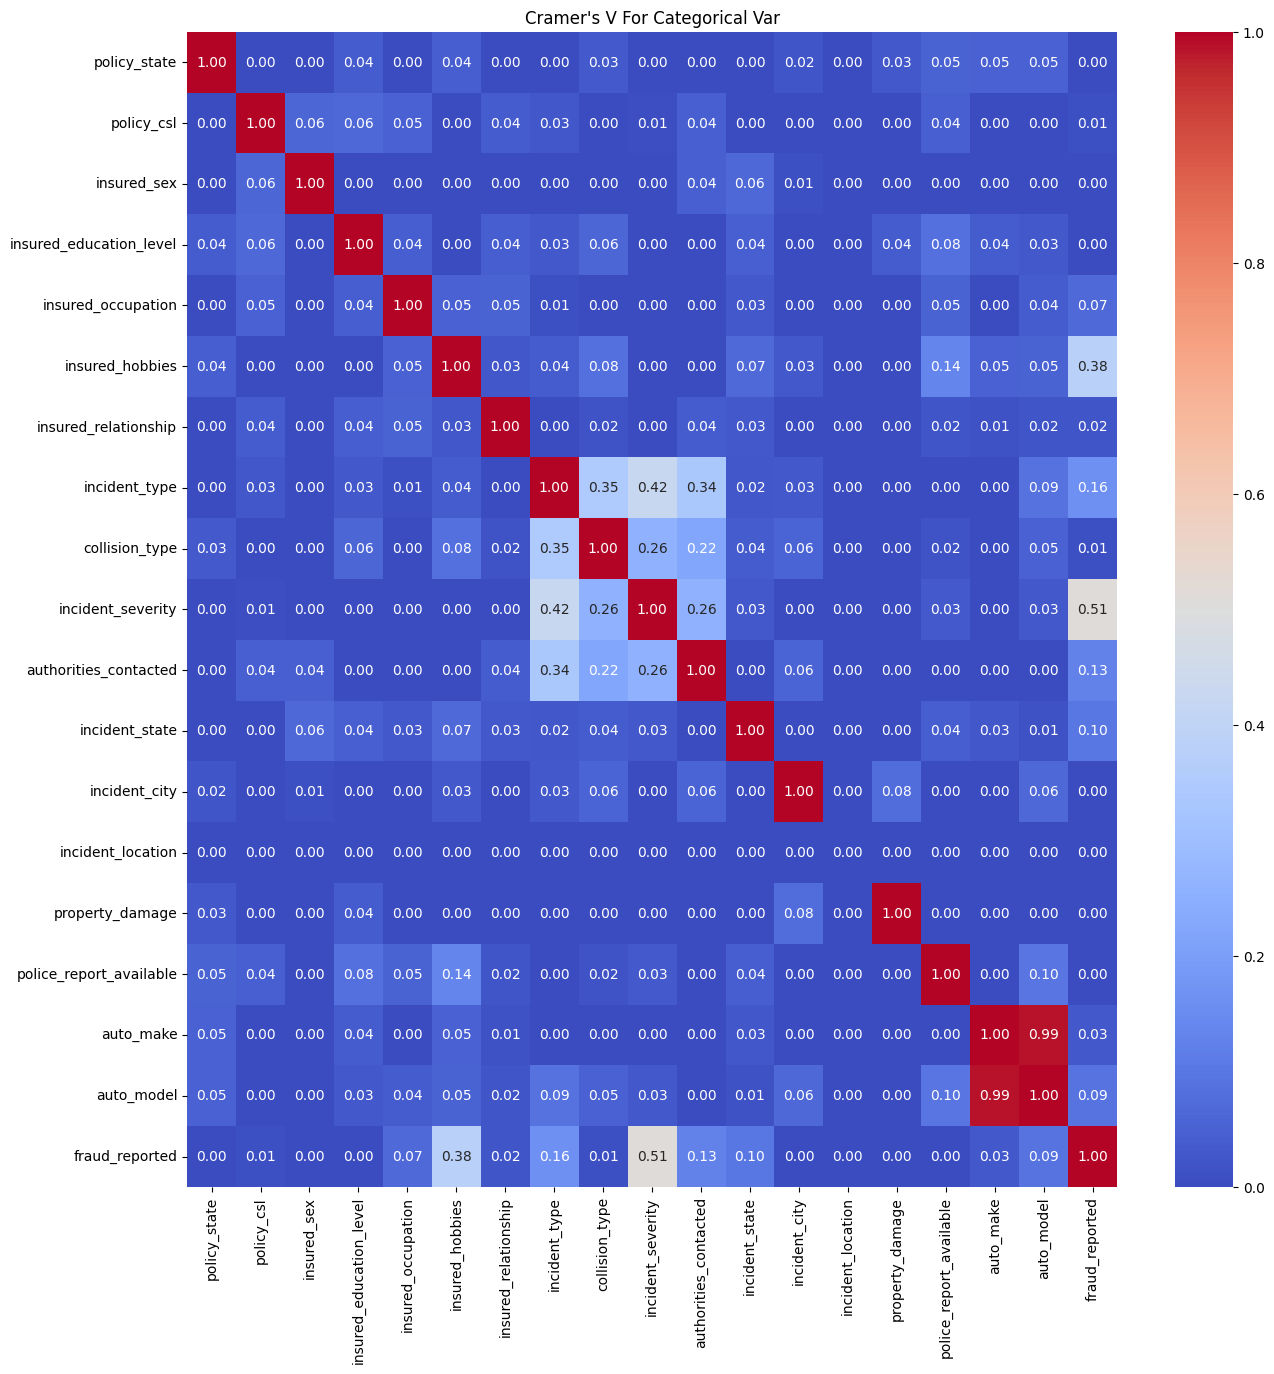

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.2f')
plt.title("Cramer's V For Categorical Var")
plt.show()

In [21]:
var_cat = list(set(var_cat)-set(['auto_model', 'incident_location']))

In [22]:
df = df[var_num+var_cat]
df

,policy_deductable,age,policy_number,policy_annual_premium,witnesses,incident_hour_of_the_day,bodily_injuries,capital-gains,total_claim_amount,auto_year,...,insured_hobbies,fraud_reported,incident_type,incident_city,collision_type,policy_state,incident_state,property_damage,police_report_available,auto_make
0,0.333333,48,521585,0.603112,2,5,1,0.530348,0.622801,2004,...,sleeping,Y,Single Vehicle Collision,Columbus,Side Collision,OH,SC,YES,YES,Saab
1,1.000000,42,342868,0.473214,0,8,0,0.000000,0.043285,2007,...,reading,Y,Vehicle Theft,Riverwood,Rear Collision,IN,VA,NO,NO,Mercedes
2,1.000000,29,687698,0.606972,3,7,2,0.349254,0.300906,2007,...,board-games,N,Multi-vehicle Collision,Columbus,Rear Collision,OH,NY,NO,NO,Dodge
3,1.000000,41,227811,0.608582,2,5,1,0.486567,0.551298,2014,...,board-games,Y,Single Vehicle Collision,Arlington,Front Collision,IL,OH,NO,NO,Chevrolet
4,0.333333,44,367455,0.712760,1,20,0,0.656716,0.055739,2009,...,board-games,N,Vehicle Theft,Arlington,Rear Collision,IL,NY,NO,NO,Accura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.333333,38,941851,0.543574,1,20,0,0.000000,0.758579,2006,...,paintball,N,Single Vehicle Collision,Northbrook,Front Collision,OH,NC,YES,NO,Honda
996,0.333333,41,186934,0.621622,3,23,2,0.705473,0.943912,2015,...,sleeping,N,Single Vehicle Collision,Northbend,Rear Collision,IL,SC,YES,NO,Volkswagen
997,0.000000,34,918516,0.588604,3,4,2,0.349254,0.587006,1996,...,bungie-jumping,N,Multi-vehicle Collision,Arlington,Side Collision,OH,NC,NO,YES,Suburu
998,1.000000,62,533940,0.572145,1,2,0,0.000000,0.408291,1998,...,base-jumping,N,Single Vehicle Collision,Arlington,Rear Collision,IL,NY,NO,YES,Audi


In [23]:
df.describe()

,policy_deductable,age,policy_number,policy_annual_premium,witnesses,incident_hour_of_the_day,bodily_injuries,capital-gains,total_claim_amount,auto_year,umbrella_limit,insured_zip,timestamp_norm_incident,capital-loss,number_of_vehicles_involved
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.424000,38.948000,546238.648000,0.509878,1.487000,11.644000,0.992000,0.250011,0.458648,2005.103000,0.110300,501214.488000,0.497203,0.241167,1.83900
std,0.407910,9.140287,257063.005276,0.151257,1.111335,6.951373,0.820127,0.277335,0.229938,6.015861,0.229645,71701.610941,0.292127,0.252962,1.01888
min,0.000000,19.000000,100804.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1995.000000,0.000000,430104.000000,0.000000,0.000000,1.00000
25%,0.000000,32.000000,335980.250000,0.406550,1.000000,6.000000,0.000000,0.000000,0.363286,2000.000000,0.000000,448404.500000,0.237288,0.000000,1.00000
50%,0.333333,38.000000,533135.000000,0.510370,1.000000,12.000000,1.000000,0.000000,0.504747,2005.000000,0.000000,466445.500000,0.508475,0.209271,1.00000
75%,1.000000,44.000000,759099.750000,0.608554,2.000000,17.000000,2.000000,0.507711,0.613939,2010.000000,0.000000,603251.000000,0.762712,0.463546,3.00000
max,1.000000,64.000000,999435.000000,1.000000,3.000000,23.000000,2.000000,1.000000,1.000000,2015.000000,1.000000,620962.000000,1.000000,1.000000,4.00000


In [ ]:
#df.to_csv('claim-fraud-clean.csv', index=False)